# Fashion-MNIST Project

In this project, we classify the fashion-MNIST database, using convolutional neural networks.

## Preparation

We will implement the necessary libraries, modules and databases.

In [1]:
!pip install torch
!pip install torchvision

     -------------------------------------- 172.3/172.3 MB 8.8 MB/s eta 0:00:00
     ---------------------------------------- 5.7/5.7 MB 15.3 MB/s eta 0:00:00
     -------------------------------------- 133.1/133.1 kB 8.2 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 14.7 MB/s eta 0:00:00
     ------------------------------------- 536.2/536.2 kB 11.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\nicol\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 1.2/1.2 MB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 62.6/62.6 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 61.5/61.5 kB 3.2 MB/s eta 0:00:00
     -------------------------------------- 157.0/157.0 kB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 123.2/123.2 kB ? eta 0:00:00
     ---------------------------------------- 97.1/97.1 kB 5.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\nicol\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Pytorch Modules

In [2]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

torch.manual_seed(42)

### Graphing Modules

In [3]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image

function to graph MNIST.

In [4]:
def data_show(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(
        IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

## Create Dataset Class

In [5]:
IMAGE_SIZE = 16

TR_Resize = transforms.Resize((IMAGE_SIZE, IMAGE_SIZE))
TR_toTensor = transforms.ToTensor()

composed = transforms.Compose([TR_Resize, TR_toTensor])

Create two datasets:

1. Training dataset: train_data
2. Validation dataset: val_data

In [6]:
train_data = dsets.FashionMNIST(
    root='.fashion/data', train=True, transform=composed, download=True)
val_data = dsets.FashionMNIST(
    root='.fashion/data', train=False, transform=composed, download=True)

100.0%


Extracting .fashion/data\FashionMNIST\raw\train-images-idx3-ubyte.gz to .fashion/data\FashionMNIST\raw



100.0%


Extracting .fashion/data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to .fashion/data\FashionMNIST\raw



100.0%


Extracting .fashion/data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to .fashion/data\FashionMNIST\raw



100.0%


Extracting .fashion/data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to .fashion/data\FashionMNIST\raw



Each training and test example is assigned to one of the following labels:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

Now, we will graph some samples.

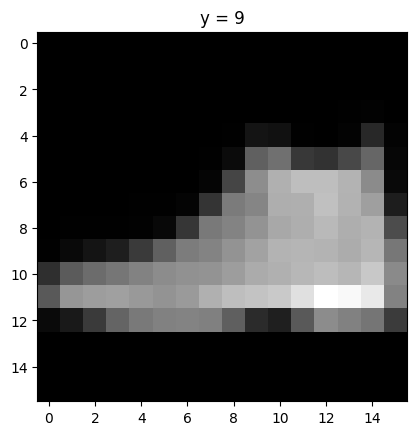

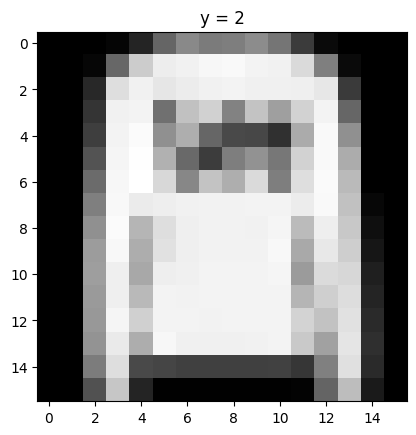

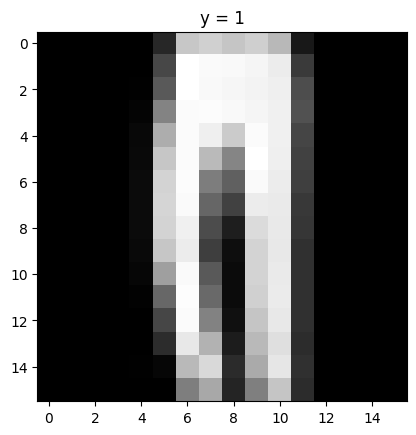

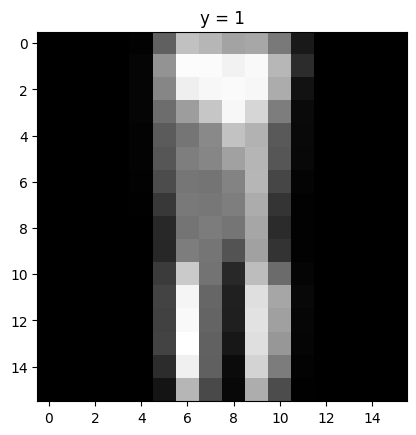

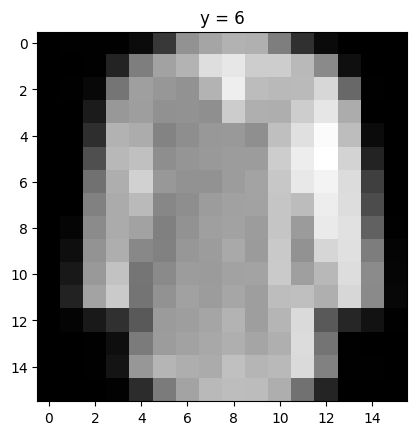

In [8]:
for n, data_sample in enumerate(val_data):
    data_show(data_sample)
    plt.show()

    if n == 4:
        break